In [25]:
import pandas as pd


In [26]:
filelist = ['birth.csv', 'breed.csv', 'report.csv', 'spec.csv','submission.csv']

# Read File

In [27]:
birth = pd.read_csv('./data/' + filelist[0])
breed = pd.read_csv('./data/' + filelist[1])
report = pd.read_csv('./data/' + filelist[2])
spec = pd.read_csv('./data/' + filelist[3])
submission = pd.read_csv('./data/' + filelist[4])
submission

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,1
0,480,NaN
1,742,NaN
2,743,NaN
3,744,NaN
4,745,NaN
...,...,...
4258,37481,NaN
4259,37482,NaN
4260,37483,NaN
4261,37484,NaN


# Change Index

In [28]:
birth_index = ['乳牛編號', '分娩日期', '乾乳日期','犢牛編號1','犢牛編號2','母牛體重','登錄日期','計算胎次','胎次','分娩難易度','犢牛體型','犢牛性別','酪農場代號']
report_index = ['ID','資料年度','資料月份','酪農場代號','乳牛編號','父親精液編號','母親乳牛編號','出生日期','胎次','泌乳天數','乳量','最近分娩日期','採樣日期','月齡','檢測日期','最後配種日期','最後配種精液','配種次數','前次分娩日期','第一次配種日期','第一次配種精液']
breed_index = ['乳牛編號','配種日期','配種精液','登錄日期','孕檢','配種方式','精液種類','酪農場代號']
spec_index = ['乳牛編號','狀況類別','狀況代號','狀況日期','備註','登錄日期','酪農場代號']
birth.columns = birth_index
report.columns = report_index
breed.columns = breed_index
spec.columns = spec_index
# birth.fillna(-1,inplace = True)
# report.fillna(-1,inplace = True)
# breed.fillna(-1, inplace = True)
# spec.fillna(-1, inplace = True)

# breed['乳牛編號'] = breed['乳牛編號'].astype(str)
# breed['乳牛編號'] = pd.Categorical(breed['乳牛編號']).codes
# report['乳牛編號'] = report['乳牛編號'].astype(str)
# report['乳牛編號'] = pd.Categorical(report['乳牛編號']).codes

# report[['父親精液編號', '母親乳牛編號']].fillna(0, inplace = True)
# report['父親精液編號'] = pd.Categorical(report['父親精液編號']).codes
# report['母親乳牛編號'] = pd.Categorical(report['母親乳牛編號']).codes

report

D:\anaconda3\lib\site-packages\pandas\core\frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親精液編號,母親乳牛編號,出生日期,胎次,泌乳天數,...,最近分娩日期,採樣日期,月齡,檢測日期,最後配種日期,最後配種精液,配種次數,前次分娩日期,第一次配種日期,第一次配種精液
0,1,2013,3,A,52612,219,930,2011/1/1 00:00,1,78.0,...,2013/1/1 00:00,2013/3/20 00:00,26,2013/3/21 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
1,2,2013,4,A,52612,219,930,2011/1/1 00:00,1,107.0,...,2013/1/1 00:00,2013/4/18 00:00,27,2013/4/19 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
2,3,2013,5,A,52612,219,930,2011/1/1 00:00,1,140.0,...,2013/1/1 00:00,2013/5/21 00:00,28,2013/5/22 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
3,4,2013,6,A,52612,219,930,2011/1/1 00:00,1,175.0,...,2013/1/1 00:00,2013/6/25 00:00,29,2013/6/26 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
4,5,2013,7,A,52612,219,930,2011/1/1 00:00,1,210.0,...,2013/1/1 00:00,2013/7/30 00:00,30,2013/7/31 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37512,37513,2014,1,C,93184912,87,98,2003/3/8 00:00,8,12.0,...,2014/1/8 00:00,2014/1/20 00:00,130,2014/1/21 00:00,NaN,NaN,0,2012/11/16 00:00,NaN,NaN
37513,37514,2014,5,C,93184912,87,98,2003/3/8 00:00,8,137.0,...,2014/1/8 00:00,2014/5/25 00:00,134,2014/5/26 00:00,NaN,NaN,0,2012/11/16 00:00,NaN,NaN
37514,37515,2014,6,C,93184912,87,98,2003/3/8 00:00,8,168.0,...,2014/1/8 00:00,2014/6/25 00:00,135,2014/6/26 00:00,NaN,NaN,0,2012/11/16 00:00,NaN,NaN
37515,37516,2014,7,C,93184912,87,98,2003/3/8 00:00,8,197.0,...,2014/1/8 00:00,2014/7/24 00:00,136,2014/7/25 00:00,NaN,NaN,0,2012/11/16 00:00,NaN,NaN


# Split into Train and Test dataframe

In [29]:
Train_ID = [rep_val for rep_val in report['ID'].values if rep_val not in submission['ID'].values]
Train_report = report.loc[report['ID'].isin(Train_ID)]
Train_Number = Train_report['乳牛編號'].values
Train_report['ID'].values


array([    1,     2,     3, ..., 37515, 37516, 37517], dtype=int64)

In [30]:
Test_ID = [rep_val for rep_val in report['ID'].values if rep_val in submission['ID'].values]
Test_report = report.loc[report['ID'].isin(Test_ID)]
Test_Number = Test_report['乳牛編號'].values
Test_report


,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親精液編號,母親乳牛編號,出生日期,胎次,泌乳天數,...,最近分娩日期,採樣日期,月齡,檢測日期,最後配種日期,最後配種精液,配種次數,前次分娩日期,第一次配種日期,第一次配種精液
479,480,2019,1,A,52631,200,1018,2011/3/17 00:00,4,435.0,...,2017/11/1 00:00,2019/1/10 00:00,94,2019/1/15 00:00,2019/2/3 00:00,551HO00657,6,2016/8/4 00:00,2018/1/6 00:00,614HO07276
741,742,2019,2,A,52640,200,941,2011/4/1 00:00,4,13.0,...,2019/1/29 00:00,2019/2/11 00:00,94,2019/2/12 00:00,2019/2/28 00:00,551HO00695,0,2017/6/17 00:00,2019/2/28 00:00,551HO00695
742,743,2019,3,A,52640,200,941,2011/4/1 00:00,4,35.0,...,2019/1/29 00:00,2019/3/5 00:00,95,2019/3/6 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
743,744,2019,4,A,52640,200,941,2011/4/1 00:00,4,70.0,...,2019/1/29 00:00,2019/4/9 00:00,96,2019/4/11 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
744,745,2019,5,A,52640,200,941,2011/4/1 00:00,4,98.0,...,2019/1/29 00:00,2019/5/7 00:00,97,2019/5/9 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37480,37481,2019,6,C,6187446,13,87,2017/6/1 00:00,1,15.0,...,2019/6/10 00:00,2019/6/25 00:00,24,2019/6/27 00:00,2019/7/24 00:00,001HO12901,0,NaN,2019/7/24 00:00,001HO12901
37481,37482,2019,6,C,6187448,13,64,2017/6/17 00:00,1,22.0,...,2019/6/3 00:00,2019/6/25 00:00,24,2019/6/27 00:00,NaN,NaN,0,NaN,NaN,NaN
37482,37483,2019,6,C,6187449,13,54,2017/8/10 00:00,1,21.0,...,2019/6/4 00:00,2019/6/25 00:00,22,2019/6/27 00:00,NaN,NaN,0,NaN,NaN,NaN
37483,37484,2019,7,C,6187449,13,54,2017/8/10 00:00,1,51.0,...,2019/6/4 00:00,2019/7/25 00:00,23,2019/7/26 00:00,NaN,NaN,0,NaN,NaN,NaN


# Extract features

In [31]:
report_drop_columns = ['ID','資料年度', '資料月份', '出生日期','最近分娩日期','採樣日期','檢測日期'
               ,'最後配種日期','最後配種精液','前次分娩日期','第一次配種日期','第一次配種精液','父親精液編號', '母親乳牛編號']
Test_report_drop_columns = ['資料年度', '資料月份', '出生日期','最近分娩日期','採樣日期','檢測日期'
               ,'最後配種日期','最後配種精液','前次分娩日期','第一次配種日期','第一次配種精液', '父親精液編號', '母親乳牛編號']
# ['資料年度','父親精液編號','母親乳牛編號','出生日期','最近分娩日期','採樣日期','檢測日期'
#                ,'最後配種日期','最後配種精液','前次分娩日期','第一次配種日期','第一次配種精液']
mapping = {'A' : 0, 'B':1,'C':2}
Train_report_x = Train_report.drop(columns=report_drop_columns, axis = 1)
Train_report_x['酪農場代號'] = Train_report_x['酪農場代號'].map(mapping)


Test_report_x = Test_report.drop(columns=Test_report_drop_columns, axis = 1)
Test_report_x['酪農場代號'] = Test_report_x['酪農場代號'].map(mapping)
Train_report_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33254 entries, 0 to 37516
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   酪農場代號   33254 non-null  int64  
 1   乳牛編號    33254 non-null  int64  
 2   胎次      33254 non-null  int64  
 3   泌乳天數    33253 non-null  float64
 4   乳量      33254 non-null  float64
 5   月齡      33254 non-null  int64  
 6   配種次數    33254 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 2.0 MB


In [32]:
breed_drop_columns = ['配種日期','登錄日期']
breed_x = breed.drop(columns=breed_drop_columns, axis = 1)
breed_x['配種精液'] = pd.Categorical(breed_x['配種精液']).codes
breed_x['配種方式'] = pd.Categorical(breed_x['配種方式']).codes
breed_x['精液種類'] = pd.Categorical(breed_x['精液種類']).codes
breed_x['酪農場代號'] = breed_x['酪農場代號'].map(mapping)
Train_breed_x = breed_x.loc[breed_x['乳牛編號'].isin(Train_Number)]
Test_breed_x = breed_x.loc[breed_x['乳牛編號'].isin(Test_Number)]
Train_breed_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11902 entries, 806 to 21034
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   乳牛編號    11902 non-null  int64
 1   配種精液    11902 non-null  int16
 2   孕檢      11902 non-null  int64
 3   配種方式    11902 non-null  int8 
 4   精液種類    11902 non-null  int8 
 5   酪農場代號   11902 non-null  int64
dtypes: int16(1), int64(3), int8(2)
memory usage: 418.4 KB


In [ ]:
# birth feature
birth_drop_columns = ['分娩日期', '乾乳日期', '犢牛編號1', '犢牛編號2', '登錄日期', '計算胎次', '犢牛體型', '犢牛性別']
birth_x = birth.drop(columns=birth_drop_columns, axis = 1)
# birth_x.describe(include = ['O'])
birth_x['酪農場代號'] = birth_x['酪農場代號'].map(mapping)
Train_birth_x = birth_x.loc[birth_x['乳牛編號'].isin(Train_Number)]
Test_birth_x = birth_x.loc[birth_x['乳牛編號'].isin(Test_Number)]
Train_birth_x

# Quantify features

In [33]:
# Observe Report Feature 
Train_report_x['泌乳天數'].fillna(Train_report_x['泌乳天數'].mean(), inplace = True)
Test_report_x['泌乳天數'].fillna(Test_report_x['泌乳天數'].mean(), inplace = True)


In [5]:
def mon2season(mon):
    if 3 <= mon <= 5:
        return '春'
    elif 6 <= mon <= 8:
        return '夏'
    elif 9 <= mon <= 11:
        return '秋'
    return '冬'

In [6]:
report[['資料月份', '乳量']].groupby(['資料月份'], as_index=False).mean().sort_values(by='乳量', ascending=False)

,資料月份,乳量
1,2,25.239202
2,3,25.094327
3,4,24.943239
0,1,24.634626
4,5,24.382015
5,6,24.088705
11,12,23.779956
10,11,23.762559
6,7,23.086387
9,10,23.002408


In [7]:
# Quantify feature
report.info()
'''
    年度、月份考慮丟掉。
'''
# report['資料年度'] = report['資料年度'] - 2013 
# report['資料月份'] = report['資料月份'].apply(mon2season)
report[['資料月份', '乳量']].groupby(['資料月份'], as_index=False).mean().sort_values(by='乳量', ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37517 entries, 0 to 37516
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       37517 non-null  int64  
 1   資料年度     37517 non-null  int64  
 2   資料月份     37517 non-null  int64  
 3   酪農場代號    37517 non-null  object 
 4   乳牛編號     37517 non-null  int64  
 5   父親精液編號   36641 non-null  object 
 6   母親乳牛編號   33933 non-null  object 
 7   出生日期     37517 non-null  object 
 8   胎次       37517 non-null  int64  
 9   泌乳天數     37516 non-null  float64
 10  乳量       33254 non-null  float64
 11  最近分娩日期   37516 non-null  object 
 12  採樣日期     37517 non-null  object 
 13  月齡       37517 non-null  int64  
 14  檢測日期     37517 non-null  object 
 15  最後配種日期   35981 non-null  object 
 16  最後配種精液   35981 non-null  object 
 17  配種次數     37517 non-null  int64  
 18  前次分娩日期   20097 non-null  object 
 19  第一次配種日期  36086 non-null  object 
 20  第一次配種精液  36086 non-null  object 
dtypes: float64(2

,資料月份,乳量
2,春,24.800234
0,冬,24.552449
1,夏,23.370379
3,秋,23.219010


In [7]:
from datetime import datetime
# 處理日期
def str2date(pd):
    try:
        pd = pd.copy()
        for i in range(len(pd)):
            pd[i] = datetime.strptime(pd[i], "%Y/%m/%d %H:%M")
        return pd
    except:
        print('Can not convert to datetime. Maybe missing value or type is not string.')
        return pd

In [8]:
report['出生日期'] = str2date(report['出生日期'])

report['最近分娩日期'] = report['最近分娩日期'].fillna('2015/1/31 00:00')
report['最近分娩日期'] = str2date(report['最近分娩日期'])

report['採樣日期'] = str2date(report['採樣日期'])
report['檢測日期'] = str2date(report['檢測日期'])

In [21]:
report['乳牛編號'].astype(str).describe()

count        37517
unique        1991
top       98127843
freq            68
Name: 乳牛編號, dtype: object

In [9]:
def date_split(name, pd):
    pd[name + '月'] = pd[name].apply(lambda x: x.month)
    pd[name + '日'] = pd[name].apply(lambda x: x.day)

In [10]:
date_split('出生日期', report)
date_split('最近分娩日期', report)
date_split('採樣日期', report)
date_split('檢測日期', report)


report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37517 entries, 0 to 37516
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       37517 non-null  int64  
 1   資料年度     37517 non-null  int64  
 2   資料月份     37517 non-null  int64  
 3   酪農場代號    37517 non-null  object 
 4   乳牛編號     37517 non-null  int64  
 5   父親精液編號   36641 non-null  object 
 6   母親乳牛編號   33933 non-null  object 
 7   出生日期     37517 non-null  object 
 8   胎次       37517 non-null  int64  
 9   泌乳天數     37516 non-null  float64
 10  乳量       33254 non-null  float64
 11  最近分娩日期   37517 non-null  object 
 12  採樣日期     37517 non-null  object 
 13  月齡       37517 non-null  int64  
 14  檢測日期     37517 non-null  object 
 15  最後配種日期   35981 non-null  object 
 16  最後配種精液   35981 non-null  object 
 17  配種次數     37517 non-null  int64  
 18  前次分娩日期   20097 non-null  object 
 19  第一次配種日期  36086 non-null  object 
 20  第一次配種精液  36086 non-null  object 
 21  出生日期月    375

In [11]:
for i in ['出生日期', '最近分娩日期', '採樣日期', '檢測日期']:
    print(report[[i + '月', '乳量']].groupby([i + '月'], as_index=False).mean().sort_values(by='乳量', ascending=False))
    print(report[[i + '日', '乳量']].groupby([i + '日'], as_index=False).mean().sort_values(by='乳量', ascending=False))

    出生日期月         乳量
8       9  25.603298
7       8  24.977334
10     11  24.543203
11     12  24.512186
0       1  24.093022
1       2  23.963089
6       7  23.880515
9      10  23.872654
2       3  23.844802
4       5  22.759797
5       6  22.651344
3       4  22.464303
    出生日期日         乳量
10     11  25.509241
11     12  25.476146
27     28  25.067256
2       3  24.759074
6       7  24.679562
25     26  24.612873
12     13  24.582278
22     23  24.534465
0       1  24.502961
18     19  24.440753
26     27  24.283359
17     18  24.260990
4       5  24.133718
8       9  24.098126
3       4  24.067969
13     14  23.987158
5       6  23.970303
16     17  23.904747
23     24  23.886071
19     20  23.790576
9      10  23.773962
14     15  23.726238
30     31  23.720787
1       2  23.181884
24     25  23.056941
15     16  22.859295
20     21  22.857373
21     22  22.767384
29     30  22.577671
7       8  22.413832
28     29  22.294847
    最近分娩日期月         乳量
11       12  24.941477
0        

In [51]:
# Observe Breed Feature 
breed.info()
breed['孕檢'].astype(str).describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21050 entries, 0 to 21049
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   乳牛編號    21050 non-null  int64 
 1   配種日期    21050 non-null  object
 2   配種精液    21050 non-null  object
 3   登錄日期    21050 non-null  object
 4   孕檢      21050 non-null  int64 
 5   配種方式    213 non-null    object
 6   精液種類    228 non-null    object
 7   酪農場代號   21050 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.3+ MB


count     21050
unique        1
top           0
freq      21050
Name: 孕檢, dtype: object

In [ ]:
# Observe Birth Feature
Train_birth_x.info()
Train_birth_x.describe()

Train_birth_x['母牛體重'].fillna(Train_birth_x['母牛體重'].mean(), inplace = True)
Test_birth_x['母牛體重'].fillna(Test_birth_x['母牛體重'].mean(), inplace = True)
Train_birth_x['分娩難易度'].fillna(Train_birth_x['分娩難易度'].mean(), inplace = True)
Test_birth_x['分娩難易度'].fillna(Test_birth_x['分娩難易度'].mean(), inplace = True)

Train_birth_x.info()
Train_birth_x.describe()

In [ ]:
# def season(time):
#     if len(item) == 0:
#         return 0
#     temp = int(item.split('/')[1])
#     if temp >= 1 and temp <= 3:
#         return '春'
#     elif temp >= 4 and temp <= 6:
#         return '夏'
#     elif temp >= 7 and temp <= 9:
#         return '秋'
#     elif temp >= 10 and temp <= 12:
#         return '冬'
#     else:
#         return 0

In [ ]:
# for i, item in enumerate(birth['分娩日期']):
#     birth.loc[i, '分娩日期'] = season(item)
# birth

In [ ]:
# res = pd.merge(birth, breed, on = '乳牛編號')
# res = pd.merge(res, report, on = '乳牛編號')
# res = pd.merge(res, spec, on = '乳牛編號')
# res['分娩日期'][1]

# Data Normalization

In [34]:
Train_breed_x['配種精液'] = (Train_breed_x['配種精液']-Train_breed_x['配種精液'].mean()) / Train_breed_x['配種精液'].std()
Train_breed_x
Test_breed_x['配種精液'] = (Test_breed_x['配種精液']-Test_breed_x['配種精液'].mean()) / Test_breed_x['配種精液'].std()
Test_breed_x

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,乳牛編號,配種精液,孕檢,配種方式,精液種類,酪農場代號
7576,95121878,1.028313,0,-1,-1,1
7577,95121878,0.381689,0,-1,-1,1
7578,95121878,1.933587,0,-1,-1,1
8383,97051427,0.922082,0,-1,-1,0
8384,97051427,0.825088,0,-1,-1,0
...,...,...,...,...,...,...
21045,6187429,-1.031647,0,-1,-1,2
21046,6187431,-1.031647,0,-1,-1,2
21047,6187441,-1.031647,0,-1,-1,2
21048,6187442,-1.031647,0,-1,-1,2


# Merge Data

In [35]:
x = pd.merge(Train_report_x, Train_breed_x, on = ['乳牛編號', '酪農場代號'])
# x = pd.merge(x, Train_birth_x, on = ['乳牛編號', '酪農場代號'])
# x = Train_report_x
y = x['乳量'].values
x = x.drop(columns = ['乳牛編號','乳量'], axis = 1)
x

,酪農場代號,胎次,泌乳天數,月齡,配種次數,配種精液,孕檢,配種方式,精液種類
0,0,1,78.0,26,1,1.458493,0,-1,-1
1,0,1,78.0,26,1,0.460452,0,-1,-1
2,0,1,78.0,26,1,0.460452,0,-1,-1
3,0,1,78.0,26,1,0.460452,0,-1,-1
4,0,1,78.0,26,1,1.532766,0,-1,-1
...,...,...,...,...,...,...,...,...,...
282252,2,8,229.0,137,0,0.692555,0,-1,-1
282253,2,8,229.0,137,0,0.692555,0,-1,-1
282254,2,8,229.0,137,0,1.504914,0,-1,-1
282255,2,8,229.0,137,0,-0.839322,0,-1,-1


# Define Model

In [36]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
svr = SVR()
regr = MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

# Train Model

In [38]:
# svr.fit(x,y)
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=1)
regr.fit(X_train, y_train)
len(X_test)

Iteration 1, loss = 85.57193428
Iteration 2, loss = 31.81528779
Iteration 3, loss = 28.16542022
Iteration 4, loss = 25.40939560
Iteration 5, loss = 23.35344099
Iteration 6, loss = 21.85820034
Iteration 7, loss = 20.84094212
Iteration 8, loss = 20.37904147
Iteration 9, loss = 20.02568404
Iteration 10, loss = 19.95032738
Iteration 11, loss = 19.80716287
Iteration 12, loss = 19.76116467
Iteration 13, loss = 19.72448709
Iteration 14, loss = 19.67893848
Iteration 15, loss = 19.63714964
Iteration 16, loss = 19.66286048
Iteration 17, loss = 19.62161892
Iteration 18, loss = 19.60163085
Iteration 19, loss = 19.59668141
Iteration 20, loss = 19.52229413
Iteration 21, loss = 19.61151889
Iteration 22, loss = 19.54004459
Iteration 23, loss = 19.62384994
Iteration 24, loss = 19.51572293
Iteration 25, loss = 19.58897996
Iteration 26, loss = 19.52151963
Iteration 27, loss = 19.49387332
Iteration 28, loss = 19.50117787
Iteration 29, loss = 19.54149033
Iteration 30, loss = 19.48389649
Iteration 31, loss 

70565

# Validation

In [39]:
# predict = svr.predict(x)
# svr.score(x,y)
predict = regr.predict(X_test)
regr.score(X_test,y_test)

0.5286030698503053

Text(0, 0.5, 'Measured')

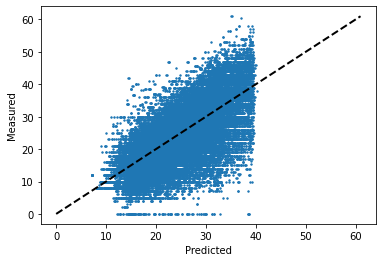

In [40]:
plt.scatter(predict,y_test,s=2)
#plt.plot(predict_y, predict_y, 'ro')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Measured')

In [41]:
# The mean squared error
from math import sqrt

print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, predict)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, predict))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, predict))

Root mean squared error: 6.09
Mean absolute error: 4.65
R-squared: 0.53


# Test

In [42]:
test_x = pd.merge(Test_report_x, Test_breed_x, on = ['乳牛編號', '酪農場代號'], how = 'left')
# test_x = pd.merge(test_x, Test_birth_x, on = ['乳牛編號', '酪農場代號'], how = 'left')

test_x['孕檢'] = test_x['孕檢'].fillna(0)
test_x['配種精液'] = test_x['配種精液'].fillna(test_x['配種精液'].mean())
test_x['配種方式'] = test_x['配種方式'].fillna(test_x['配種方式'].mean())
test_x['精液種類'] = test_x['精液種類'].fillna(test_x['精液種類'].mean())
x_without_ID = test_x.drop(columns = ['乳牛編號','乳量','ID'], axis = 1)
x_without_ID

,酪農場代號,胎次,泌乳天數,月齡,配種次數,配種精液,孕檢,配種方式,精液種類
0,0,4,435.0,94,6,0.811232,0.0,-1.000000,-1.000000
1,0,4,435.0,94,6,0.511014,0.0,-1.000000,-1.000000
2,0,4,435.0,94,6,0.829707,0.0,-1.000000,-1.000000
3,0,4,435.0,94,6,0.196939,0.0,-1.000000,-1.000000
4,0,4,435.0,94,6,0.811232,0.0,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...
22815,2,1,15.0,24,0,-1.031647,0.0,-1.000000,-1.000000
22816,2,1,22.0,24,0,0.038237,0.0,-0.995428,-0.995208
22817,2,1,21.0,22,0,0.038237,0.0,-0.995428,-0.995208
22818,2,1,51.0,23,0,0.038237,0.0,-0.995428,-0.995208


In [19]:
test_x.describe()

,ID,酪農場代號,乳牛編號,父親精液編號,母親乳牛編號,胎次,泌乳天數,乳量,月齡,配種次數,配種精液,孕檢,配種方式,精液種類
count,22820.000000,22820.000000,2.282000e+04,22820.000000,22820.000000,22820.000000,22820.000000,0.0,22820.000000,22820.000000,22820.000000,22820.0,22820.000000,22820.000000
mean,17908.407143,0.787905,1.022311e+07,164.866696,639.720859,2.608326,221.929535,NaN,58.723926,2.570245,0.038237,0.0,-0.995428,-0.995208
std,11768.979927,0.657589,2.427799e+07,119.336099,427.136282,1.509849,157.522387,NaN,23.309767,2.553193,0.996595,0.0,0.067356,0.068948
min,480.000000,0.000000,5.263100e+04,-1.000000,-1.000000,1.000000,2.000000,NaN,21.000000,0.000000,-1.096310,0.0,-1.000000,-1.000000
25%,5594.000000,0.000000,2.188135e+06,45.000000,278.000000,2.000000,102.000000,NaN,41.000000,1.000000,-0.939272,0.0,-1.000000,-1.000000
50%,16557.000000,1.000000,3.128835e+06,182.000000,601.000000,2.000000,191.000000,NaN,54.000000,2.000000,-0.149467,0.0,-1.000000,-1.000000
75%,28804.000000,1.000000,5.051789e+06,268.000000,1067.000000,3.000000,311.000000,NaN,71.000000,4.000000,1.111450,0.0,-1.000000,-1.000000
max,37485.000000,2.000000,9.918321e+07,342.000000,1265.000000,8.000000,1044.000000,NaN,153.000000,15.000000,2.141431,0.0,0.000000,0.000000


In [43]:
predict = regr.predict(x_without_ID)
val = pd.DataFrame({'預測乳量':predict})
mx = test_x.join(val)
x_group = mx.groupby(['ID']).mean()
x_index = list(range(0,x_group.shape[0]))
x_group

,酪農場代號,乳牛編號,胎次,泌乳天數,乳量,月齡,配種次數,配種精液,孕檢,配種方式,精液種類,預測乳量
ID,,,,,,,,,,,,
480,0,52631,4,435.0,NaN,94,6,0.875235,0.0,-1.000000,-1.000000,14.109082
742,0,52640,4,13.0,NaN,94,0,0.892637,0.0,-1.000000,-1.000000,31.516224
743,0,52640,4,35.0,NaN,95,1,0.892637,0.0,-1.000000,-1.000000,35.358217
744,0,52640,4,70.0,NaN,96,1,0.892637,0.0,-1.000000,-1.000000,33.936247
745,0,52640,4,98.0,NaN,97,1,0.892637,0.0,-1.000000,-1.000000,31.798180
...,...,...,...,...,...,...,...,...,...,...,...,...
37481,2,6187446,1,15.0,NaN,24,0,-1.031647,0.0,-1.000000,-1.000000,17.384277
37482,2,6187448,1,22.0,NaN,24,0,0.038237,0.0,-0.995428,-0.995208,19.362543
37483,2,6187449,1,21.0,NaN,22,0,0.038237,0.0,-0.995428,-0.995208,16.382453


In [ ]:
# test_x = test_x.reset_index()
# mx = test_x.join(val)

In [44]:
mx = x_group

Text(0, 0.5, 'predict value')

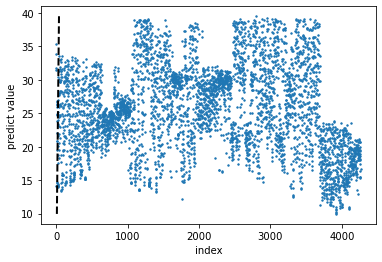

In [45]:
plt.scatter(x_index,mx['預測乳量'].values,s=2)
#plt.plot(predict_y, predict_y, 'ro')
plt.plot([mx['預測乳量'].values.min(), mx['預測乳量'].values.max()], 
         [mx['預測乳量'].values.min(),mx['預測乳量'].values.max()], 'k--', lw=2)
plt.xlabel('index')
plt.ylabel('predict value')

In [46]:
for index in range(mx.shape[0]):
    submission.loc[index, ['1']] = mx['預測乳量'].values[index]
submission

,ID,1
0,480,14.109082
1,742,31.516224
2,743,35.358217
3,744,33.936247
4,745,31.798180
...,...,...
4258,37481,17.384277
4259,37482,19.362543
4260,37483,16.382453
4261,37484,18.153093


In [47]:
submission.columns = ['ID','預測乳量']

In [48]:
submission.to_csv('result_2d_rpnd_bdaugnz2.csv',index = False)